In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import json

In [9]:
(np.load("ckpts/math_aug2_easy0.42_hard0.58_total20000/test_answer_types5_seed2.npy")==0).mean()

0.28648

In [8]:
(np.load("ckpts/math_aug2_unmemorized_total15533/test_answer_types5_seed3.npy")==0).mean()

0.17928

In [12]:

(np.load("ckpts/y_math_aug_easy0.25_medium0.25_hard0.50_total10000/test_answer_types5_seed2.npy")==0).mean()

0.24624

In [20]:
with open('data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [21]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard = []

for EASY_RATIO in [1., 0.75, 0.5, 0.25,0.]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
        # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



        num_memorized_all = []
        num_correct_different_all = []
        num_incorrect_all = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_all.append(num_memorized)
            num_correct_different_all.append(num_correct_different)
            num_incorrect_all.append(num_incorrect)

        num_memorized_all = np.array(num_memorized_all)
        num_correct_different_all = np.array(num_correct_different_all)
        num_incorrect_all = np.array(num_incorrect_all)
        
        ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard.append(ratios)
ratios_all_testhard= np.array(ratios_all_testhard)
        # ratios_all_testeasy

In [22]:
train_correct.shape

(5000, 5)

In [56]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard2 = []


CKPT_NAME=f"math_aug2_unmemorized_total15533"

subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")


ratios = []


train_correct = []
train_samples = []
for seed in [0, 1, 2]:
    train_correct_seed = np.load("ckpts/"+CKPT_NAME+f"/train_aug_answer_types1_seed{seed}.npy")==0
    train_samples_seed = np.load("ckpts/"+CKPT_NAME+f"/train_aug_answers1_seed{seed}.npy")
    train_correct.append(train_correct_seed)
    train_samples.append(train_samples_seed)

train_correct = np.array(train_correct)
train_samples = np.array(train_samples)

train_correct = np.transpose(train_correct, (1, 0, 2)).squeeze()
train_samples = np.transpose(train_samples, (1, 0, 2)).squeeze()
# hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
# easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

for input_idx in range(len(train_correct)):
    num_memorized = 0
    num_correct_different = 0
    num_incorrect = 0
    for sample_idx in range(3):
        correct = train_correct[input_idx, sample_idx]
        if correct:
            if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                num_memorized+=1
            else:
                num_correct_different+=1
        else:
            num_incorrect+=1 
    num_memorized_all.append(num_memorized)
    num_correct_different_all.append(num_correct_different)
    num_incorrect_all.append(num_incorrect)

num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)
    

In [58]:
num_memorized_all

array([3, 0, 0, ..., 3, 3, 3])

In [51]:
train_correct[1]

array([ True,  True,  True])

(array([  344.,     0.,     0.,   152.,     0.,     0.,   282.,     0.,
            0., 14755.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

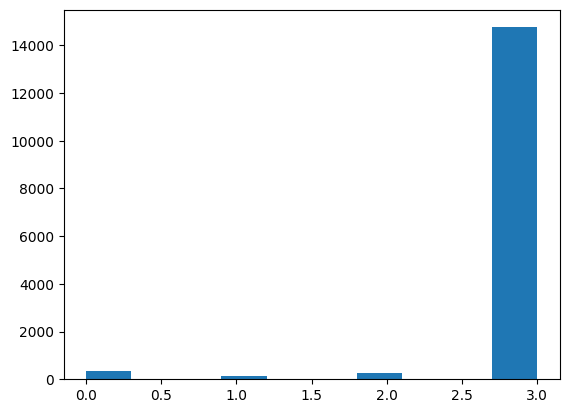

In [62]:
plt.hist(num_memorized_all)

In [66]:
train_samples[10]

array(["  The value of $P$ is given by $P=  \\left( 1 - \\frac{1}{2} \\right) \\left( 1 - \\frac{1}{3} \\right) \\left( 1 - \\frac{1}{4} \\right) \\dotsm \\left( 1 - \\frac{1}{n} \\right)$.\nIf we add another factor of $\\left( 1 - \\frac{1}{n+1} \\right)$, the new value of $P$ is $P'=P \\cdot \\left( 1 - \\frac{1}{n+1} \\right)$.\nWe can simplify $P$ as follows:\n\\[P = \\left( 1 - \\frac{1}{2} \\right) \\left( 1 - \\frac{1}{3} \\right) \\left( 1 - \\frac{1}{4} \\right) \\dotsm \\left( 1 - \\frac{1}{n} \\right) = \\frac{1}{2} \\cdot \\frac{2}{3} \\cdot \\frac{3}{4} \\dotsm \\frac{n-1}{n} = \\frac{1}{n}.\\]\nSo, if $n=2007$, then $P = \\frac{1}{2007}$.\nNow, we can find the new value of $P'$:\n\\[P' = P \\cdot \\left( 1 - \\frac{1}{n+1} \\right) = \\frac{1}{2007} \\cdot \\left( 1 - \\frac{1}{2008} \\right) = \\frac{1}{2007} \\cdot \\frac{2007}{2008} = \\frac{1}{2008}.\\]\nSo, the new value of $P$ when $n=2007$ and we add the factor of $\\left( 1 - \\frac{1}{n+1} \\right)$ is $\\frac{1}

In [50]:
train_answers[subsample_idxs[1]]

' The given equation is \\[\\arctan \\frac{1}{x} + \\arctan \\frac{1}{x^3} + \\arctan \\frac{1}{x^5} = \\frac{\\pi}{4}.\\]\n\nWe know that $\\arctan a + \\arctan b = \\arctan \\frac{a+b}{1-ab}$ if $ab < 1$.\n\nApplying this formula to the first two terms on the left side, we get\n\\[\\arctan \\frac{1}{x} + \\arctan \\frac{1}{x^3} = \\arctan \\frac{\\frac{1}{x} + \\frac{1}{x^3}}{1 - \\frac{1}{x} \\cdot \\frac{1}{x^3}} = \\arctan \\frac{x^3 + x}{x^4 - 1}.\\]\n\nSo the original equation can be rewritten as\n\\[\\arctan \\frac{x^3 + x}{x^4 - 1} + \\arctan \\frac{1}{x^5} = \\frac{\\pi}{4}.\\]\n\nAgain applying the formula, we get\n\\[\\arctan \\frac{\\frac{x^3 + x}{x^4 - 1} + \\frac{1}{x^5}}{1 - \\frac{x^3 + x}{x^4 - 1} \\cdot \\frac{1}{x^5}} = \\frac{\\pi}{4}.\\]\n\nSimplifying the numerator in the fraction inside the arctan gives\n\\[\\frac{x^3 + x + \\frac{x^4 - 1}{x^5}}{x^4 - 1 - \\frac{x^3 + x}{x^5}} = \\frac{\\pi}{4}.\\]\n\nSimplifying the numerator and denominator gives\n\\[\\frac{x^